<a href="https://colab.research.google.com/github/BhaveshVadher1/Scaler---Clustering/blob/main/Scaler_Clustering_Bhavesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

**Scaler Case Study**

#### Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.


#### **Objectives**

- Profiling the best companies and job positions to work for from the Scaler database. The task is to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics


In [ ]:
#Importing Data from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import re
from matplotlib import pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/scaler_clustering.csv')

#EDA

In [ ]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [ ]:
df.rename(index=str, columns={'Unnamed: 0':'Index', 'company_hash':'company','email_hash':'user_id','orgyear':'joining_year'}, inplace=True)

In [ ]:
df.head()

,Index,company,user_id,joining_year,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.shape

(205843, 7)

In [ ]:
df.dtypes

Index                 int64
company              object
user_id              object
joining_year        float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [ ]:
print(df.describe())

               Index   joining_year           ctc  ctc_updated_year
count  205843.000000  205757.000000  2.058430e+05     205843.000000
mean   103273.941786    2014.882750  2.271685e+06       2019.628231
std     59741.306484      63.571115  1.180091e+07          1.325104
min         0.000000       0.000000  2.000000e+00       2015.000000
25%     51518.500000    2013.000000  5.300000e+05       2019.000000
50%    103151.000000    2016.000000  9.500000e+05       2020.000000
75%    154992.500000    2018.000000  1.700000e+06       2021.000000
max    206922.000000   20165.000000  1.000150e+09       2021.000000


##Data Preprocessing

In [ ]:
df.dtypes

Index                 int64
company              object
user_id              object
joining_year        float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [ ]:
#Missing Value Detection
print(df.isnull().sum())

Index                   0
company                44
user_id                 0
joining_year           86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64


In [ ]:
email_counts = df['user_id'].value_counts()
unique_emails = df['user_id'].nunique()

print("Number of unique emails:", unique_emails)
print("Frequency of occurrence of each email hash:")
print(email_counts)

Number of unique emails: 153443
Frequency of occurrence of each email hash:
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: user_id, Length: 153443, dtype: int64


In [ ]:
# Convert 'ctc' to lakhs and rename the column
df['ctc'] = (df['ctc'] / 100000).astype(int)
df.rename(columns={'ctc': 'ctc (In Lakhs)'}, inplace=True)

##Outlier Treatment

In [ ]:
# List of numerical columns
numerical_columns = ['joining_year', 'ctc (In Lakhs)', 'ctc_updated_year']

# Calculate and display outliers using IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print()

Column: joining_year
Number of outliers: 7764

Column: ctc (In Lakhs)
Number of outliers: 11827

Column: ctc_updated_year
Number of outliers: 2927



In [ ]:
# Checking the range of outlier for CTC (In Lakhs)
print(df['ctc (In Lakhs)'].mean())
print(df['ctc (In Lakhs)'].min())
print(df['ctc (In Lakhs)'].max())

22.523214294389412
0
10001


In [ ]:
# Checking the range of outlier for joining_year
print(df['joining_year'].mean())
print(df['joining_year'].min())
print(df['joining_year'].max())

2014.8827500400957
0.0
20165.0


In [ ]:
# Checking the range of outlier for ctc_updated_year
print(df['ctc_updated_year'].mean())
print(df['ctc_updated_year'].min())
print(df['ctc_updated_year'].max())

2019.6282312247683
2015.0
2021.0


In [ ]:
# Droping outliers from joining year column.
# Calculate IQR for joining_year
Q1 = df['joining_year'].quantile(0.25)
Q3 = df['joining_year'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop rows outside the IQR range
df = df[(df['joining_year'] >= lower_bound) & (df['joining_year'] <= upper_bound)]

# Drop rows where 'joining_year' is greater than 2024
df = df[df['joining_year'] <= 2024]

In [ ]:
# Droping outliers from ctc year column.But this will eliminate the fresher students with 0 ctc.

# Identify and keep aside rows with 'ctc' equal to 0
ctc_0_data = df[df['ctc (In Lakhs)'] == 0]

# Remove outliers from the remaining data
# Calculate IQR for 'ctc'
Q1_ctc = df['ctc (In Lakhs)'].quantile(0.25)
Q3_ctc = df['ctc (In Lakhs)'].quantile(0.75)
IQR_ctc = Q3_ctc - Q1_ctc

# Define upper and lower bounds
lower_bound_ctc = Q1_ctc - 1.5 * IQR_ctc
upper_bound_ctc = Q3_ctc + 1.5 * IQR_ctc

# Drop rows outside the IQR range
df_cleaned = df[(df['ctc (In Lakhs)'] >= lower_bound_ctc) & (df['ctc (In Lakhs)'] <= upper_bound_ctc)]

# Step 3: Combine the cleaned data with rows having 'ctc' equal to 0
df = pd.concat([df_cleaned, ctc_0_data])


In [ ]:
# Checking the range of outlier for CTC
print(df['ctc (In Lakhs)'].mean())
print(df['ctc (In Lakhs)'].min())
print(df['ctc (In Lakhs)'].max())

10.057691498095018
0
32


###Insights:
Number of unique emails: 153443 out of 205843.
Column with 0 Missing value: Index,user_id,ctc,ctc_updated_year.
Rest has a few missing values.

Outlier insights:




1.   Column: joining_year   
     Number of outliers: 7764
2.   Column: Ctc    
     Number of outliers: 13127
3.   Column: ctc_updated_year
     Number of outliers: 2927


After chceking the range of outliers I found, range of CTC and  ctc_updated_year is correct. Some values in joining year has value '', which is not possible and may be error.Also minimum is 0 also not possible hence droping the outliers in joining year

In Ctc column max Ctc is 1001 lakh, which is not possible so, eliminating outliers from CTC column also but adding 0 after that which represents fresher students.


##Missing value treatment

In [ ]:
#Missing Value
print(df.isnull().sum())

Index                   0
company                42
user_id                 0
joining_year            0
ctc (In Lakhs)          0
job_position        49529
ctc_updated_year        0
dtype: int64


In [ ]:
df=df.dropna()

In [ ]:
#Missing Value
print(df.isnull().sum())

Index               0
company             0
user_id             0
joining_year        0
ctc (In Lakhs)      0
job_position        0
ctc_updated_year    0
dtype: int64


##Datatype Conversion

In [ ]:
df.dtypes

Index                 int64
company              object
user_id              object
joining_year        float64
ctc (In Lakhs)        int64
job_position         object
ctc_updated_year    float64
dtype: object

In [ ]:
#conversion of categorical attributes to 'category'
categorical_columns = ['company', 'job_position']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
# Convert 'joining_year' and 'ctc_updated_year' columns to integer
df['joining_year'] = df['joining_year'].astype(int)
df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)

In [ ]:
df.dtypes

Index                  int64
company             category
user_id               object
joining_year           int64
ctc (In Lakhs)         int64
job_position        category
ctc_updated_year       int64
dtype: object

In [ ]:
df.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,11,Other,2020
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,4,FullStack Engineer,2019
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,20,Backend Engineer,2020
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,7,Backend Engineer,2019
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,14,FullStack Engineer,2019


## Univariate Analysis


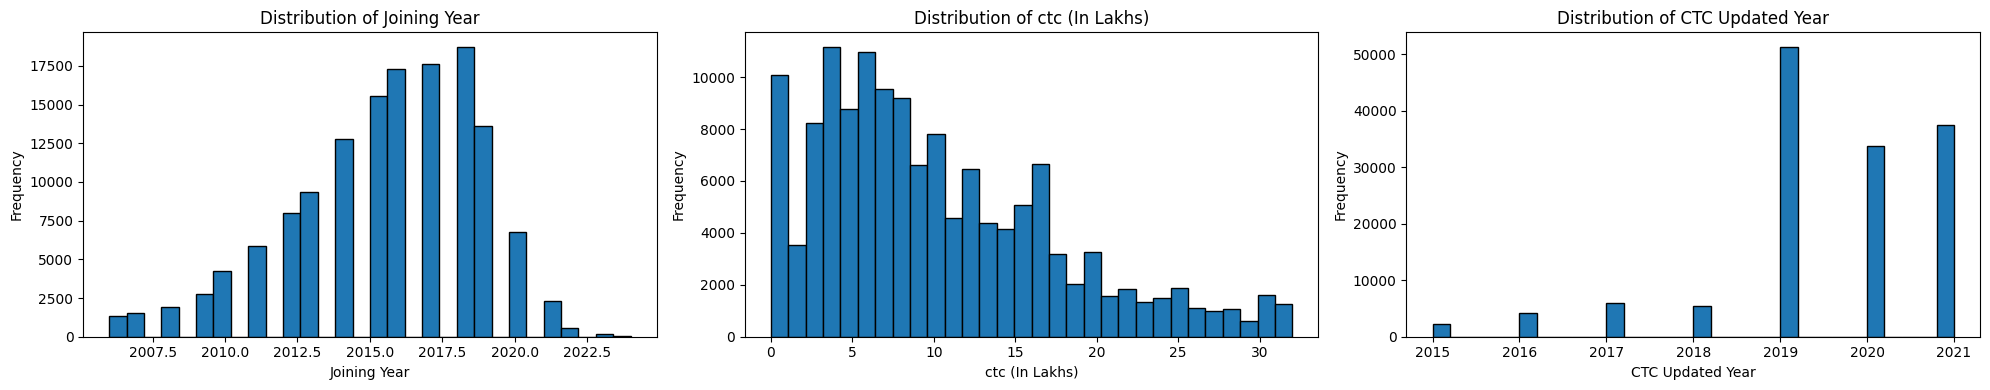

In [ ]:
# Continuous variable distribution plots
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.hist(df['joining_year'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['ctc (In Lakhs)'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of ctc (In Lakhs)')
plt.xlabel('ctc (In Lakhs)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['ctc_updated_year'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of CTC Updated Year')
plt.xlabel('CTC Updated Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

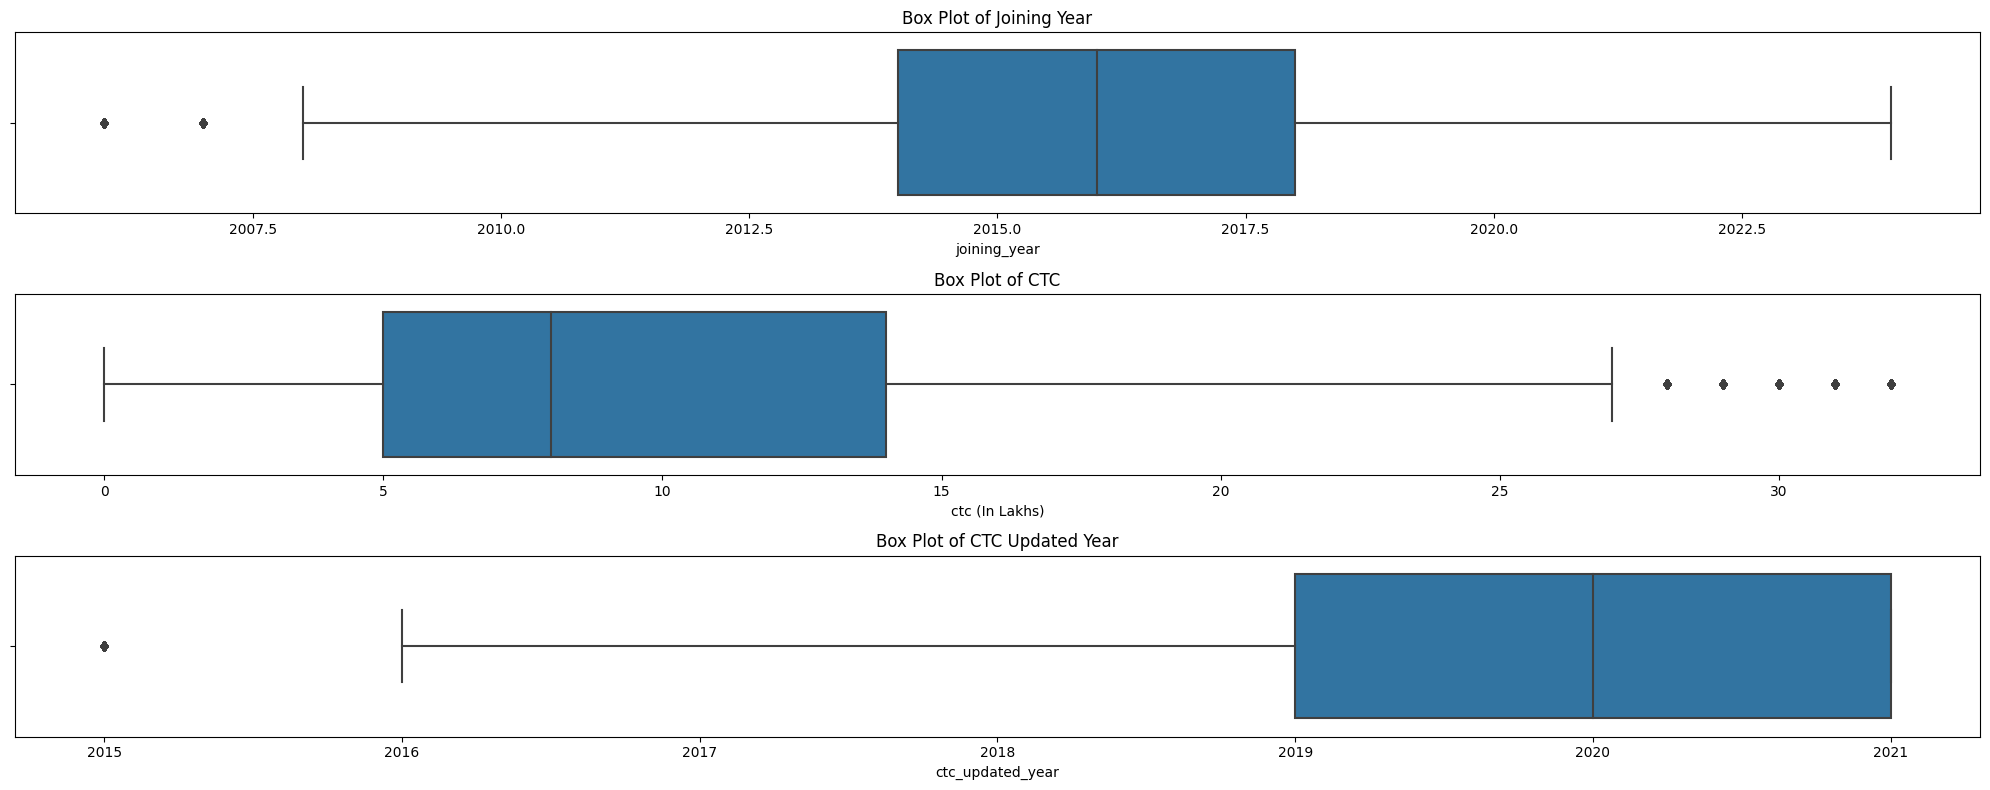

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

# Box plot for joining_year
plt.subplot(3, 1, 1)
sns.boxplot(x=df['joining_year'])
plt.title('Box Plot of Joining Year')

# Box plot for ctc
plt.subplot(3, 1, 2)
sns.boxplot(x=df['ctc (In Lakhs)'])
plt.title('Box Plot of CTC')

# Box plot for ctc_updated_year
plt.subplot(3, 1, 3)
sns.boxplot(x=df['ctc_updated_year'])
plt.title('Box Plot of CTC Updated Year')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

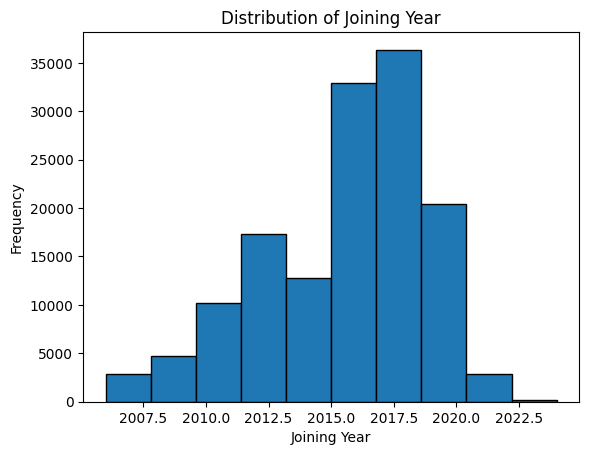

In [ ]:
plt.hist(df['joining_year'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.show

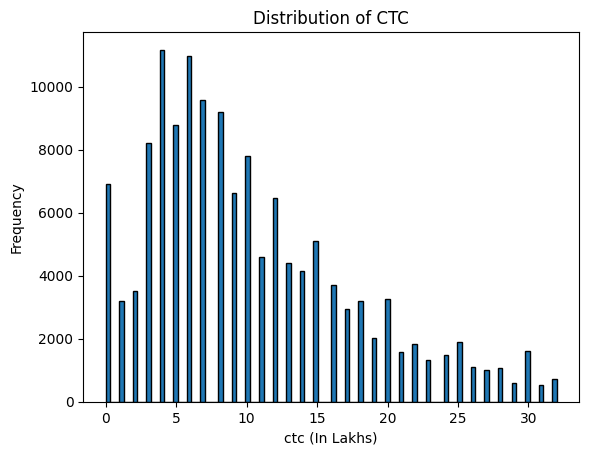

In [ ]:
plt.hist(df['ctc (In Lakhs)'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of CTC')
plt.xlabel('ctc (In Lakhs)')
plt.ylabel('Frequency')
plt.show()

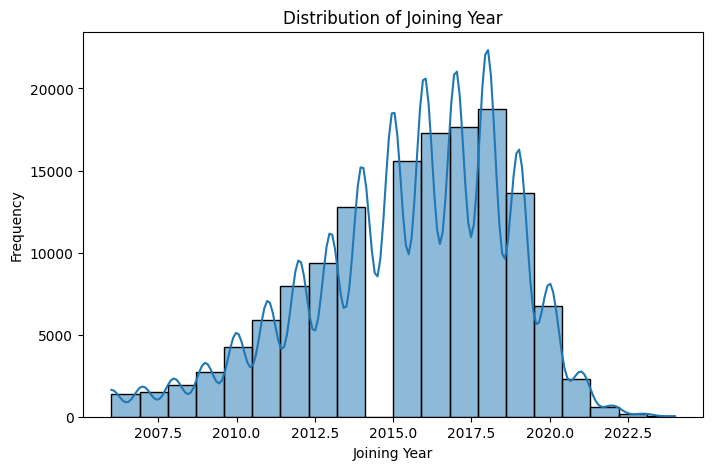

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['joining_year'], bins=20, kde=True)
plt.title('Distribution of Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.show()

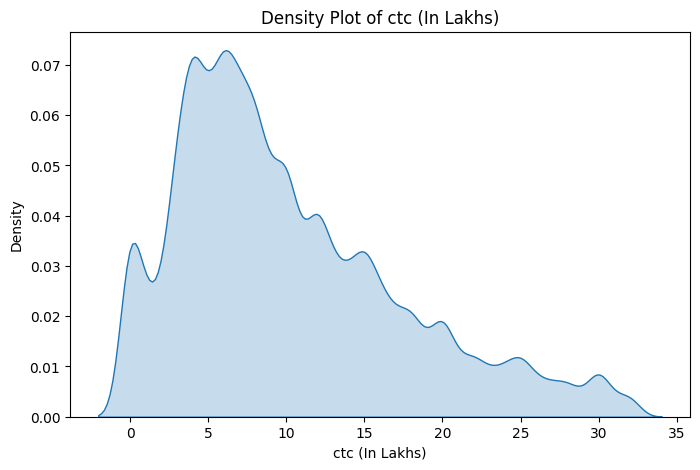

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['ctc (In Lakhs)'], fill=True)
plt.title('Density Plot of ctc (In Lakhs)')
plt.xlabel('ctc (In Lakhs)')
plt.ylabel('Density')
plt.show()

##Bivariate Analysis

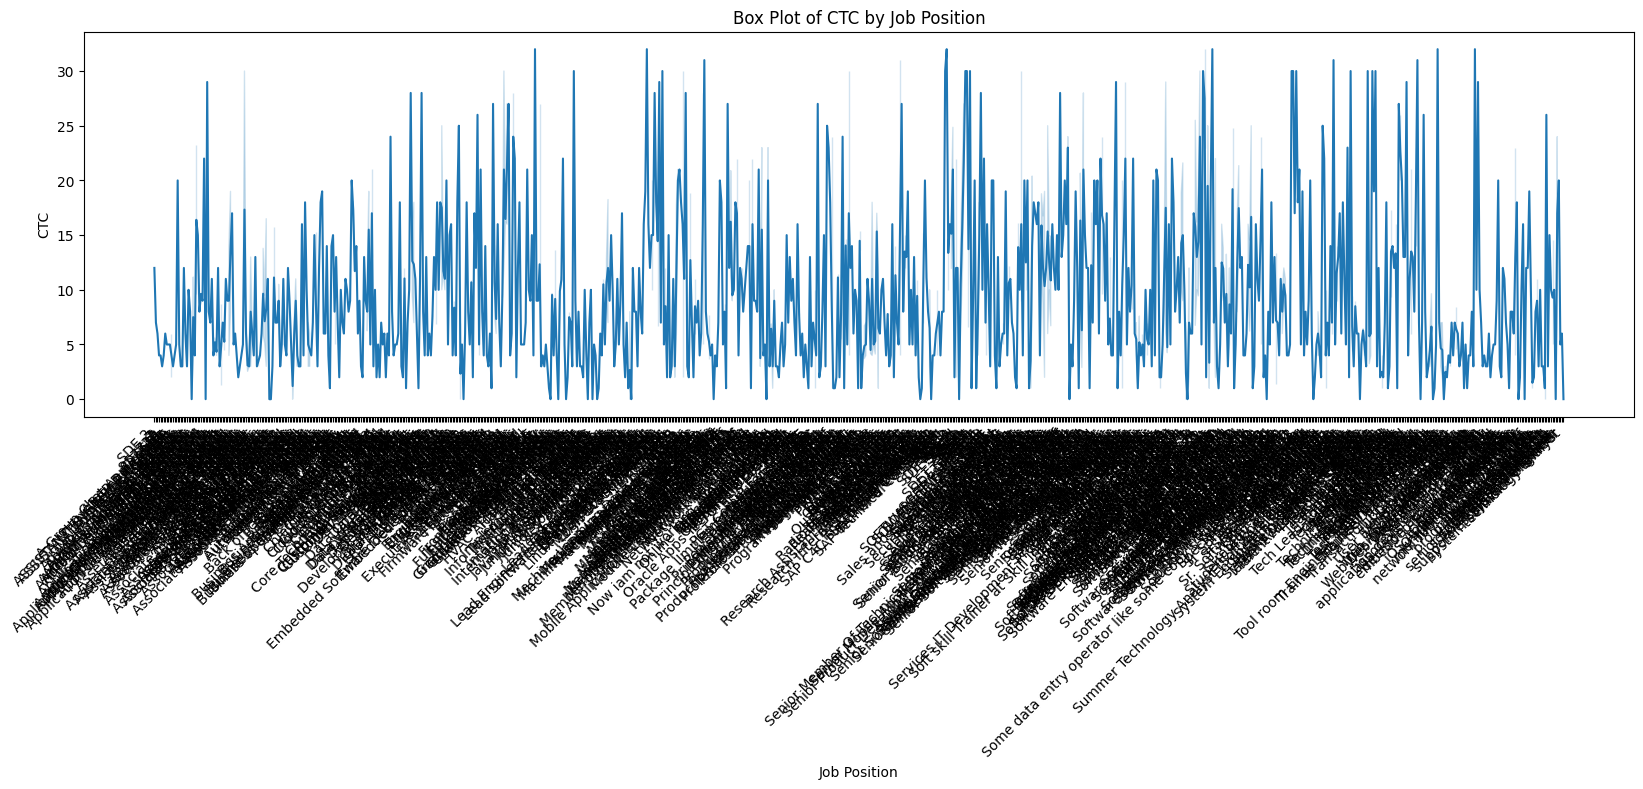

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=df['job_position'], y=df['ctc (In Lakhs)'])
plt.title('Box Plot of CTC by Job Position')
plt.xlabel('Job Position')
plt.ylabel('CTC')
plt.xticks(rotation=45, ha='right')
plt.show()

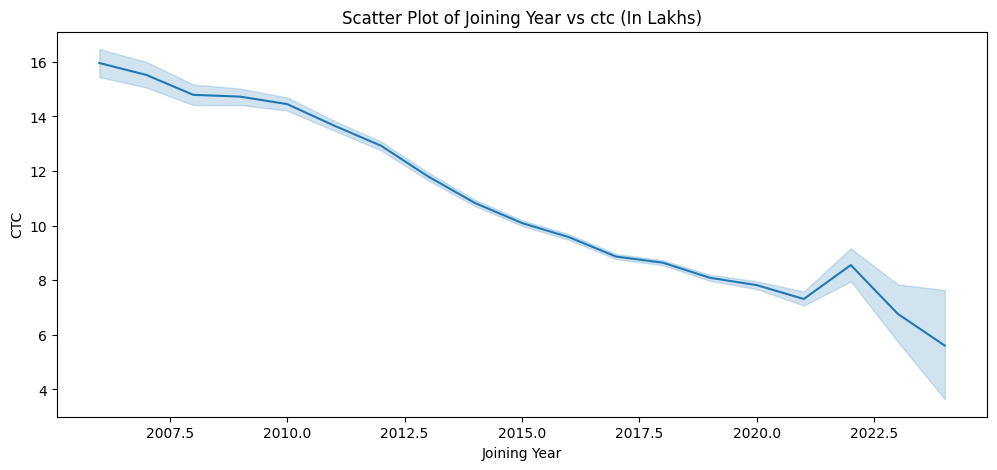

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['joining_year'], y=df['ctc (In Lakhs)'])
plt.title('Scatter Plot of Joining Year vs ctc (In Lakhs)')
plt.xlabel('Joining Year')
plt.ylabel('CTC')
plt.show()

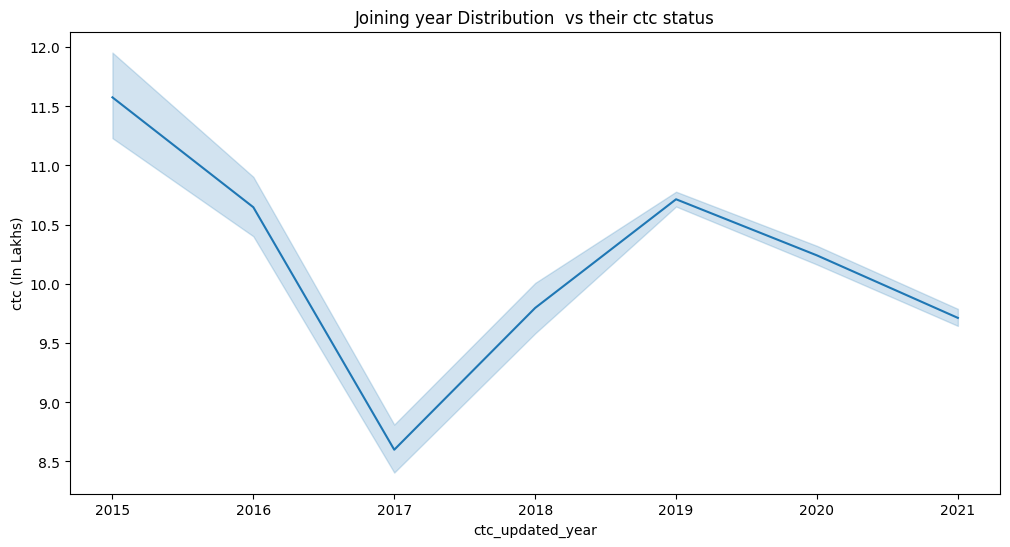

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.lineplot(data=df,x="ctc_updated_year",y="ctc (In Lakhs)")
plt.title("Joining year Distribution  vs their ctc status")
plt.show()

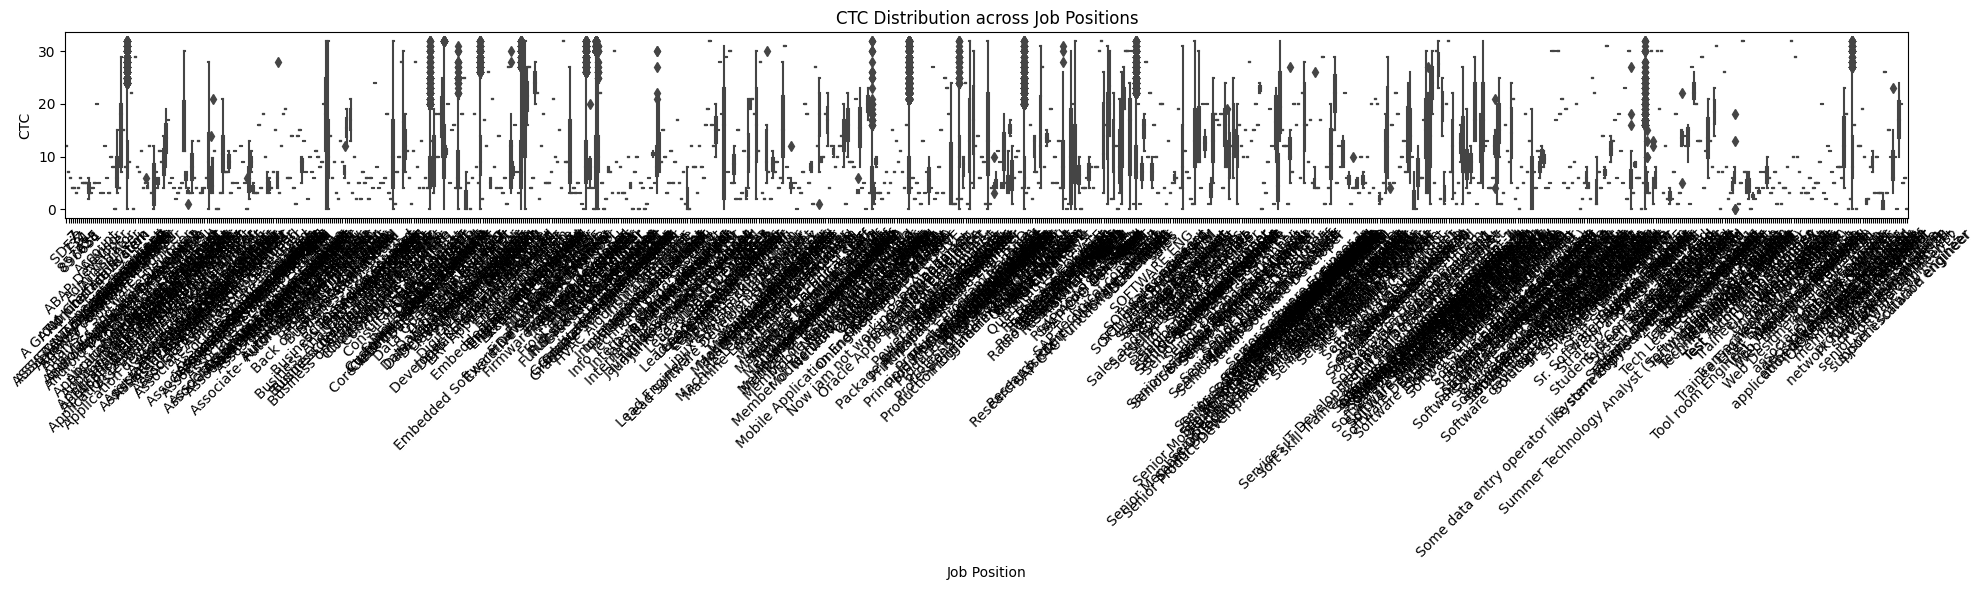

In [ ]:
# Box plot for CTC based on job position
plt.figure(figsize=(20, 6))
sns.boxplot(x='job_position', y='ctc (In Lakhs)', data=df)
plt.title('CTC Distribution across Job Positions')
plt.xlabel('Job Position')
plt.ylabel('CTC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Multivariate analysis

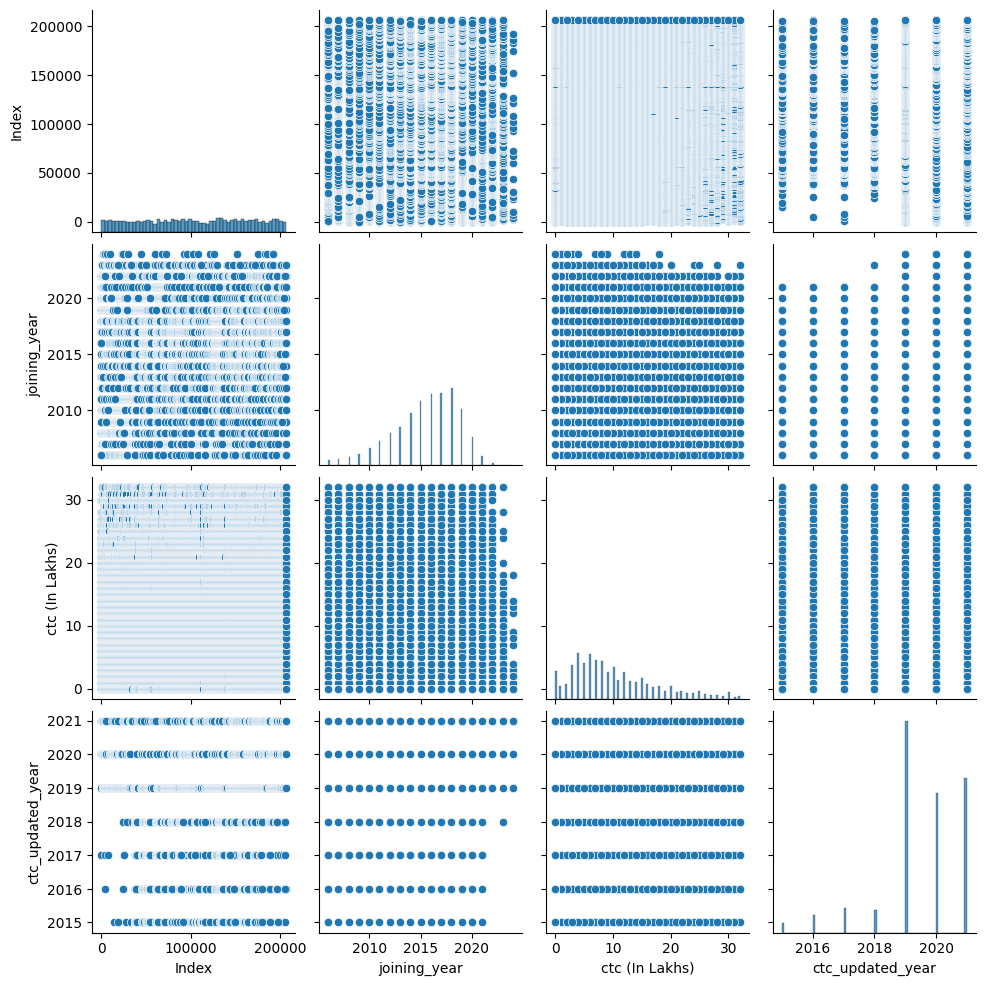

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-42-cf905bdb2dfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


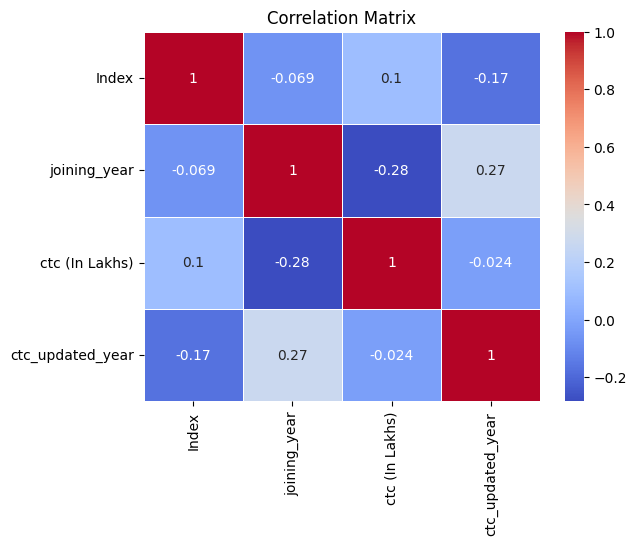

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##Insights

#Preprocessing

##Regex for cleaning

In [ ]:
import re

# Removing special characters from 'job_position' column
df['job_position'] = df['job_position'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))

# Removing special characters from 'company' column
df['company'] = df['company'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,11,Other,2020
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,4,FullStack Engineer,2019
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,20,Backend Engineer,2020
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,7,Backend Engineer,2019
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,14,FullStack Engineer,2019


##Feature Addition

In [ ]:
df['Years_of_Experience'] = df['ctc_updated_year'] - df['joining_year']

In [ ]:
df.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year,Years_of_Experience
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,11,Other,2020,4
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,4,FullStack Engineer,2019,1
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,20,Backend Engineer,2020,5
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,7,Backend Engineer,2019,2
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,14,FullStack Engineer,2019,2


#Manual Clustering

##Creating Designation Flag

In [ ]:
all_job_positions = df['job_position'].unique()
print("All Job Positions:")
print(all_job_positions)

All Job Positions:
['Other' 'FullStack Engineer' 'Backend Engineer' 'iOS Engineer'
 'Data Analyst' 'Frontend Engineer' 'Engineering Leadership'
 'Data Scientist' 'Engineering Intern' 'Android Engineer' 'QA Engineer'
 'Research Engineers' 'Fullstack Engineer' 'SDET' 'Support Engineer'
 'Security Leadership' 'Devops Engineer' 'Product Manager'
 'Program Manager' 'Cofounder' 'Product Designer' 'System Engineer'
 'Backend Architect' 'Database Administrator' 'Release Engineer' 'ASE'
 'Non Coder' 'Trainer' 'Associate Consultant' 'Administrator'
 'Software Engineer Android' 'Tool room Engineer Mechanical Engineer '
 'Senior Data Scientist' 'SDE 2' 'Project Engineer' 'MEAN Stack Developer'
 'Software Development Engineer  I' 'Senior  Software Engineer' 'SDE3'
 'Digital Marketing' 'App Developer' 'Business Analyst  Product Owner'
 'Senior Business Analyst' 'Graduate engineer  trainee'
 'Machine Learning Engineer' 'Software' '' 'Instructor' 'Worker' 'Student'
 'Operations Manager' 'Senior Engine

In [ ]:
keywords_mapping = {
    'Software': ['Software', 'Engineer', 'Developer', 'Programmer', 'Analyst', 'Architect', 'SDE', 'QA'],
    'Data': ['Data', 'Analyst', 'Scientist', 'Engineer'],
    'Manager': ['Manager', 'Lead', 'Director', 'ManagerCX', 'CTO'],
    'Consultant': ['Consultant', 'Advisor', 'Specialist'],
    'Intern': ['Intern', 'Trainee'],
    'Other': ['Other']
}

def map_to_cluster(job_position):
    for cluster, keywords in keywords_mapping.items():
        if any(keyword.lower() in job_position.lower() for keyword in keywords):
            return cluster
    return 'Other'

df1 = df.copy()


df1['Job_Position_Cluster'] = df1['job_position'].apply(map_to_cluster)


In [ ]:
print(df1['Job_Position_Cluster'].unique())

['Other' 'Software' 'Data' 'Manager' 'Consultant' 'Intern']


<ipython-input-49-08e55a95a88e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df1, x='Job_Position_Cluster', bins=10, kde=False, palette='viridis')


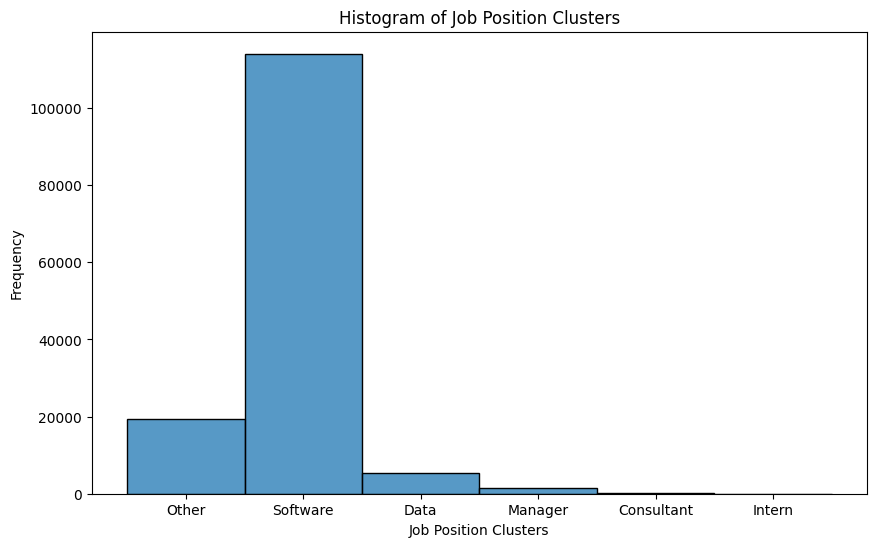

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Job_Position_Cluster', bins=10, kde=False, palette='viridis')
plt.title('Histogram of Job Position Clusters')
plt.xlabel('Job Position Clusters')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


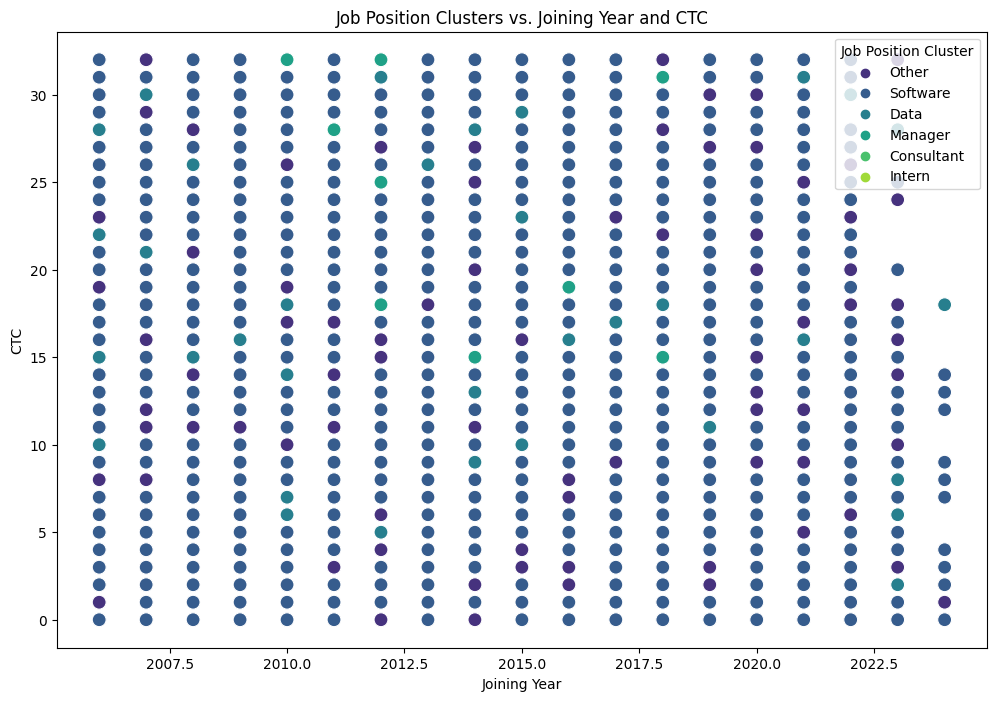

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='joining_year', y='ctc (In Lakhs)', hue='Job_Position_Cluster', palette='viridis', s=100)
plt.title('Job Position Clusters vs. Joining Year and CTC')
plt.xlabel('Joining Year')
plt.ylabel('CTC')
plt.legend(title='Job Position Cluster')
plt.show()

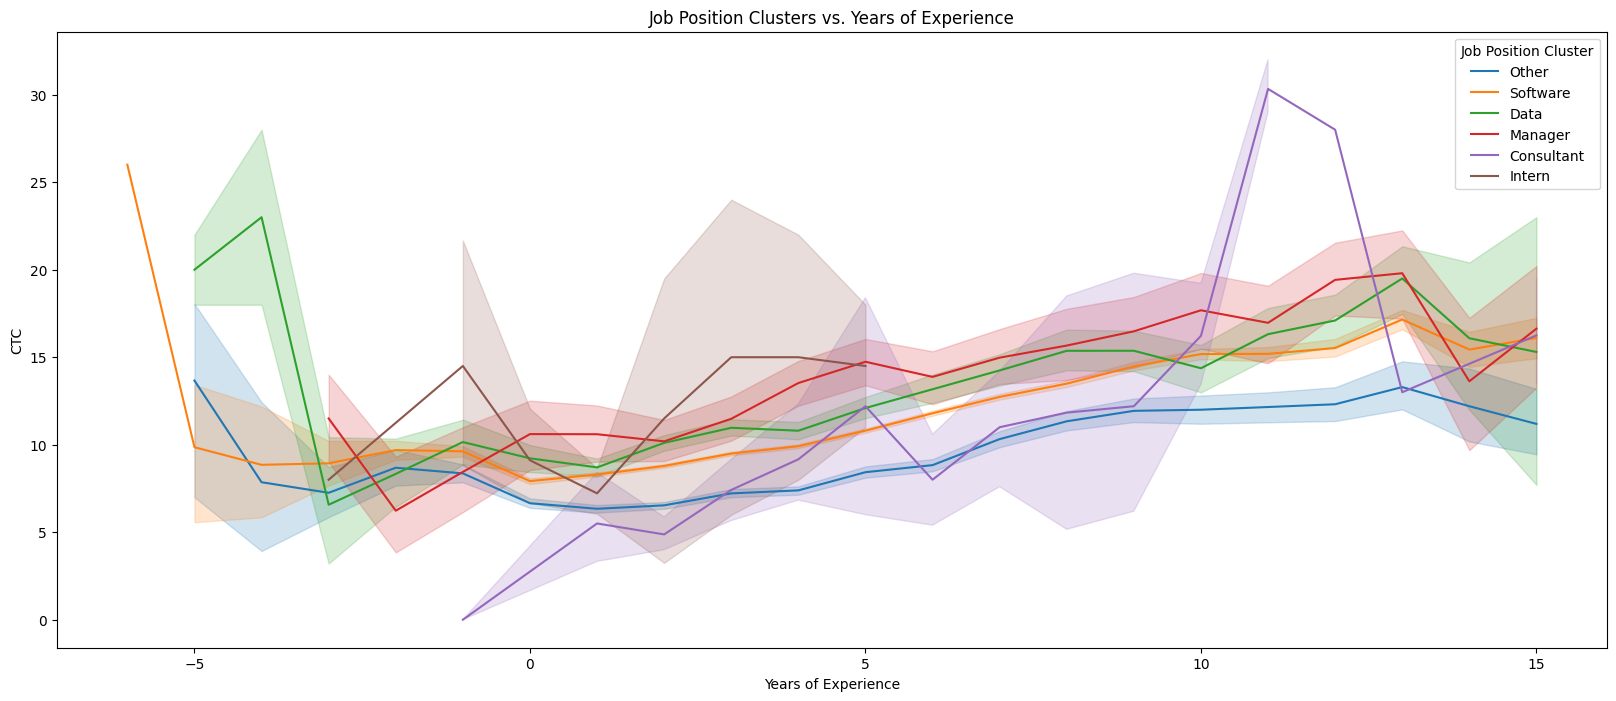

In [ ]:
# Scatter plot for Job Position Clusters vs. Years of Experience
plt.figure(figsize=(20, 8))
sns.lineplot(data=df1, x='Years_of_Experience', y='ctc (In Lakhs)', hue='Job_Position_Cluster')
plt.title('Job Position Clusters vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.legend(title='Job Position Cluster')
plt.show()

##Creating Class Flag based on CTC

In [ ]:
# Define the bins and labels
bins = [0, 3, 10, 14, 20, 30]
labels = ['Fresher', 'Low', 'Average', 'High', 'Very High']

df1['CTC_Cluster'] = pd.cut(df1['ctc (In Lakhs)'], bins=bins, labels=labels, include_lowest=True)

df1.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year,Years_of_Experience,Job_Position_Cluster,CTC_Cluster
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,11,Other,2020,4,Other,Average
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,4,FullStack Engineer,2019,1,Software,Low
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,20,Backend Engineer,2020,5,Software,High
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,7,Backend Engineer,2019,2,Software,Low
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,14,FullStack Engineer,2019,2,Software,Average


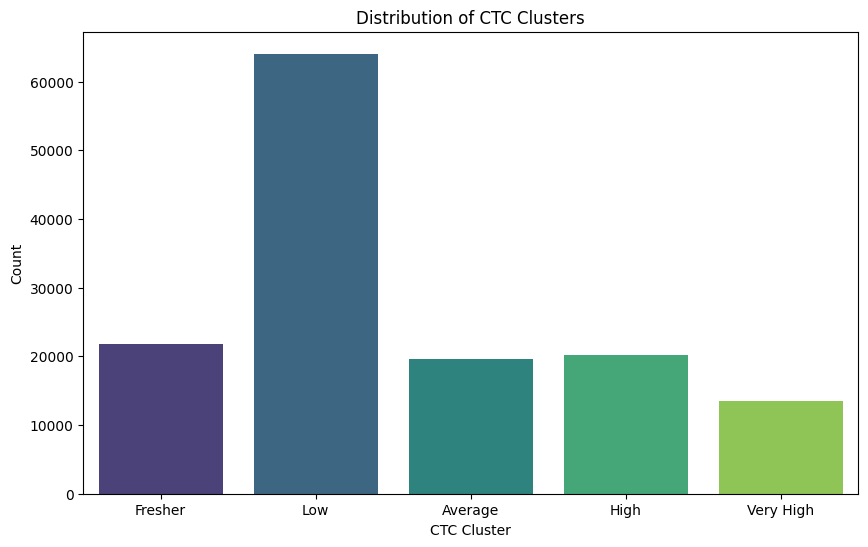

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CTC_Cluster', data=df1, palette='viridis')
plt.title('Distribution of CTC Clusters')
plt.xlabel('CTC Cluster')
plt.ylabel('Count')
plt.show()

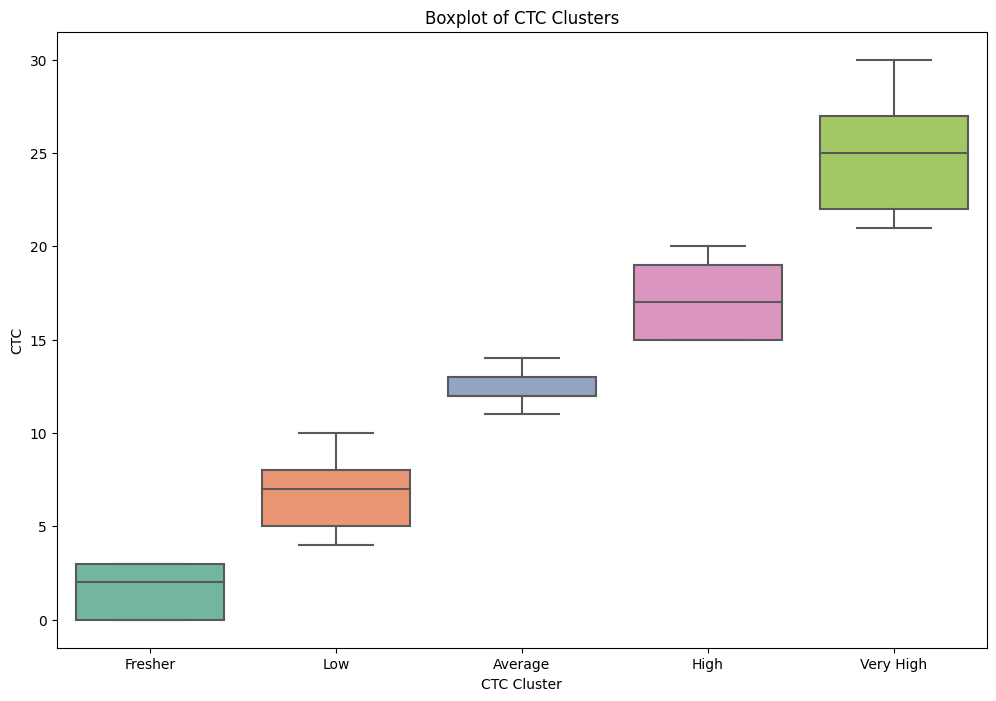

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CTC_Cluster', y='ctc (In Lakhs)', data=df1, palette='Set2')
plt.title('Boxplot of CTC Clusters')
plt.xlabel('CTC Cluster')
plt.ylabel('CTC')
plt.show()


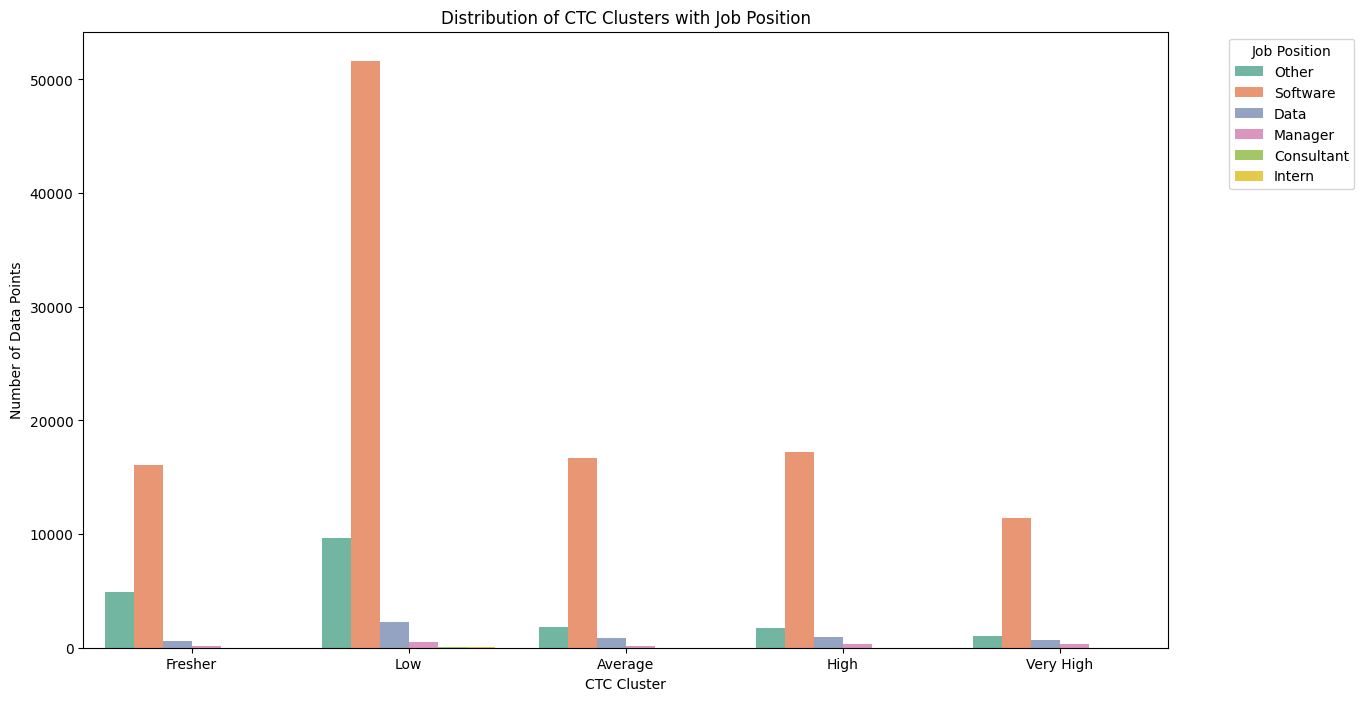

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='CTC_Cluster', data=df1, hue='Job_Position_Cluster', palette='Set2')
plt.title('Distribution of CTC Clusters with Job Position')
plt.xlabel('CTC Cluster')
plt.ylabel('Number of Data Points')
plt.legend(title='Job Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##Creating Tier Flag

In [ ]:
# Calculate average CTC per job position
avg_ctc_per_job_position = df1.groupby('job_position')['ctc (In Lakhs)'].mean().reset_index()
avg_ctc_per_job_position.columns = ['job_position', 'Avg_CTC_Per_Job_Position']


df1 = pd.merge(df1, avg_ctc_per_job_position, on='job_position', how='left')
df1 = df1.drop_duplicates(subset=['job_position']).reset_index(drop=True)

df1.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year,Years_of_Experience,Job_Position_Cluster,CTC_Cluster,Avg_CTC_Per_Job_Position
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,11,Other,2020,4,Other,Average,7.766596
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,4,FullStack Engineer,2019,1,Software,Low,9.875593
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,20,Backend Engineer,2020,5,Software,High,11.716934
3,11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016,6,iOS Engineer,2021,5,Software,Low,10.112561
4,13,wgszxkvzn,134cc4a76a119493d523f1855a3b7106f64287455d5cd4...,2016,4,Data Analyst,2020,4,Software,Low,7.562230


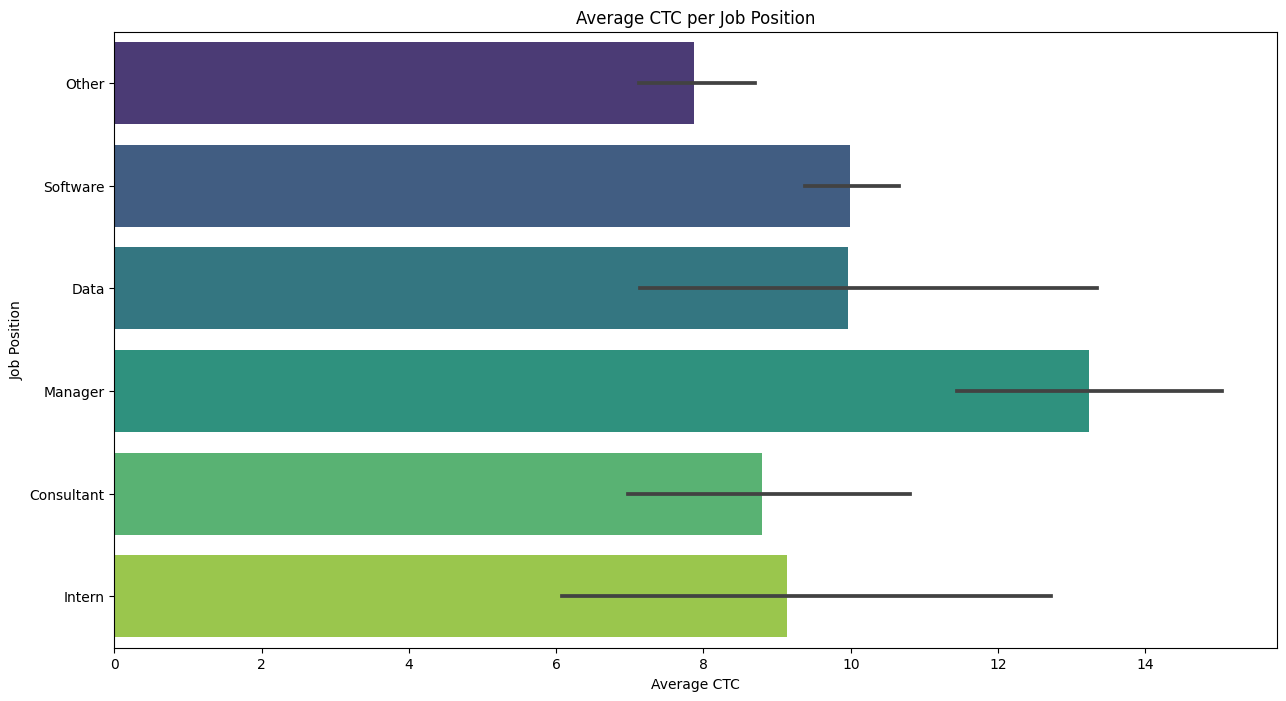

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Avg_CTC_Per_Job_Position', y='Job_Position_Cluster', data=df1, palette='viridis')
plt.title('Average CTC per Job Position')
plt.xlabel('Average CTC')
plt.ylabel('Job Position')
plt.show()

#Standardization & Encoding

##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


numerical_columns = ['joining_year', 'ctc (In Lakhs)', 'ctc_updated_year', 'Years_of_Experience']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical features
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])


In [ ]:
df1.head()

,Index,company,user_id,joining_year,ctc (In Lakhs),job_position,ctc_updated_year,Years_of_Experience,Job_Position_Cluster,CTC_Cluster,Avg_CTC_Per_Job_Position
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,0.588235,0.34375,Other,0.833333,0.421053,Other,Average,7.766596
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,0.705882,0.12500,FullStack Engineer,0.666667,0.263158,Software,Low,9.875593
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,0.529412,0.62500,Backend Engineer,0.833333,0.473684,Software,High,11.716934
3,11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,0.588235,0.18750,iOS Engineer,1.000000,0.473684,Software,Low,10.112561
4,13,wgszxkvzn,134cc4a76a119493d523f1855a3b7106f64287455d5cd4...,0.588235,0.12500,Data Analyst,0.833333,0.421053,Software,Low,7.562230


##Encoding

In [ ]:
df1 = df1.drop('user_id', axis=1)

In [ ]:
df_encoded = df1.copy()

df_encoded = pd.get_dummies(df_encoded, columns=['company','job_position','Job_Position_Cluster','CTC_Cluster'], drop_first=True)

df_encoded.head()


,Index,joining_year,ctc (In Lakhs),ctc_updated_year,Years_of_Experience,Avg_CTC_Per_Job_Position,company_0000,company_01 ojztqsj,company_05mz exzytvrny uqxcvnt rxbxnta,company_1,...,job_position_technology analyst,Job_Position_Cluster_Data,Job_Position_Cluster_Intern,Job_Position_Cluster_Manager,Job_Position_Cluster_Other,Job_Position_Cluster_Software,CTC_Cluster_Low,CTC_Cluster_Average,CTC_Cluster_High,CTC_Cluster_Very High
0,0,0.588235,0.34375,0.833333,0.421053,7.766596,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.705882,0.12500,0.666667,0.263158,9.875593,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2,0.529412,0.62500,0.833333,0.473684,11.716934,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,11,0.588235,0.18750,1.000000,0.473684,10.112561,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,13,0.588235,0.12500,0.833333,0.421053,7.562230,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


##Insight
1.   Applied MinMaxScaler to numerical columns (joining year, ctc in lakh, ctc upgraded year, years of experience).
2. Standardized the numeric data to a common scale between 0 and 1 using MinMaxScaler.
3. Utilized one-hot encoding for categorical features ('company' and 'job_position').
4. Transformed categorical variables into numerical format, with drop_first set to True.
5. Resulted DataFrame is suitable for clustering, with scaled numeric columns and one-hot-encoded categorical features.
6. The data is now in a format ready for machine learning tasks, enhancing model performance.





#Unsupervised learning:

##K Mean clustering

###Checking clustering tendency (Elbow Curve)

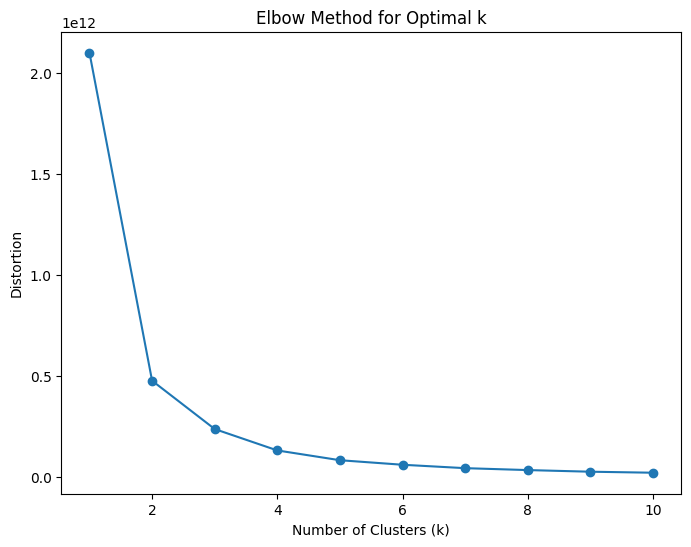

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


distortions = []
max_k = 10

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

###PCA

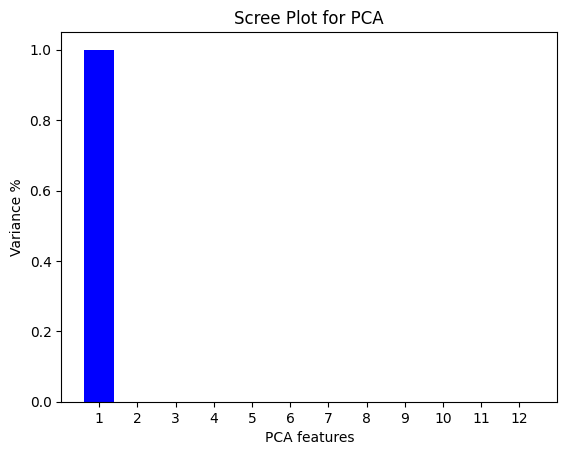

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=12)
df_pca_result = pca.fit_transform(df_encoded)


features = range(1, pca.n_components_ + 1)
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title('Scree Plot for PCA')

plt.show()

df_pca = pd.DataFrame(df_pca_result, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])

df_with_pca = pd.concat([df_encoded, df_pca], axis=1)

###Clustering


###Insights


1. The elbow curve shows a clear bend at k=2, indicating a potential natural
grouping into two clusters.
2. Another inflection point is observed at k=3, suggesting an alternative level of natural clustering.
3. We can plot dor both k=2 and k=3 and it depends on the desired balance between simplicity and granularity.
4. Selecting k=2 captures broader patterns, while k=3 allows for a more detailed exploration of subgroups.
5. Further analysis and domain knowledge are crucial for determining the optimal number of clusters for meaningful insights.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


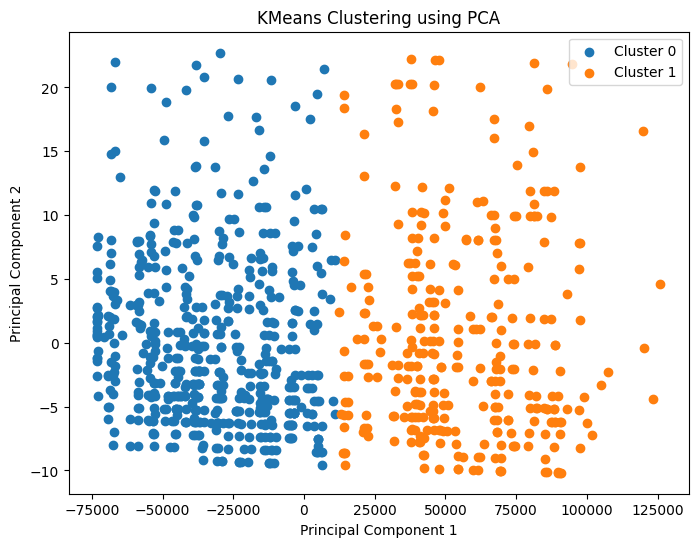

In [ ]:
numeric_columns = df_encoded.select_dtypes(include='number').columns
df_for_clustering = df_encoded[numeric_columns]

k = 2

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df_for_clustering)

df_encoded['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_for_clustering)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',
    )
plt.title('KMeans Clustering using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


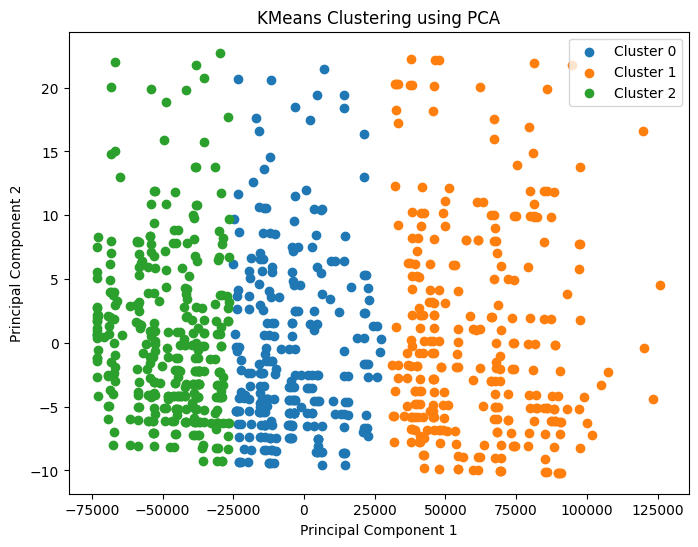

In [ ]:
numeric_columns = df_encoded.select_dtypes(include='number').columns
df_for_clustering = df_encoded[numeric_columns]

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df_for_clustering)

df_encoded['Cluster'] = kmeans.labels_



pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_for_clustering)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',
    )
plt.title('KMeans Clustering using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

##Hierarchical Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


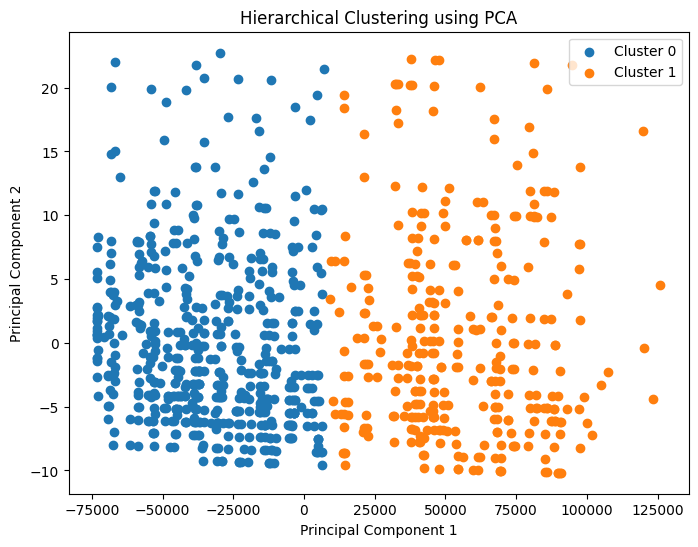

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

numeric_columns = df_encoded.select_dtypes(include='number').columns
df_for_clustering = df_encoded[numeric_columns]

k = 2

agg_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
df_encoded['Hierarchical_Cluster'] = agg_cluster.fit_predict(df_for_clustering)



pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_for_clustering)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Hierarchical_Cluster'] = agg_cluster.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        pca_df[pca_df['Hierarchical_Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Hierarchical_Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',
    )
plt.title('Hierarchical Clustering using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



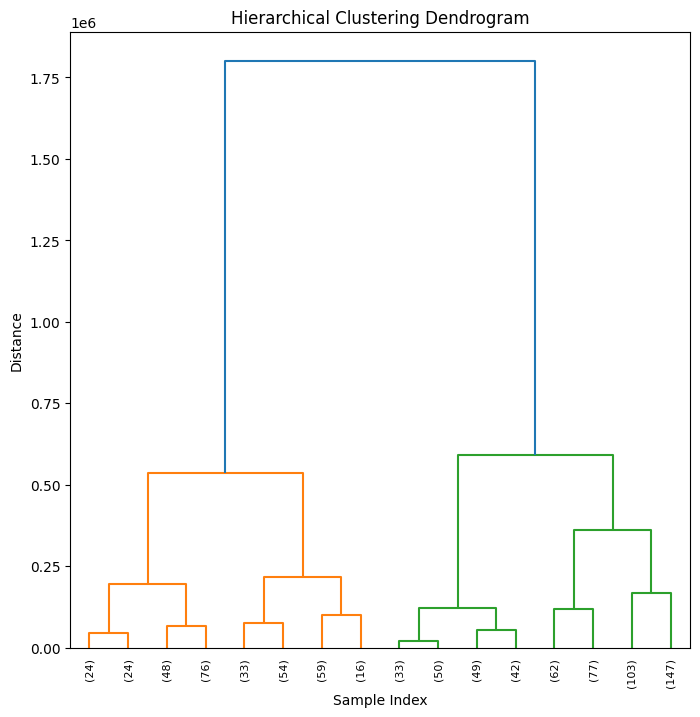

In [ ]:
linkage_matrix = linkage(df_for_clustering, method='ward')
plt.figure(figsize=(8, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#Insights

1. Data Quality:
 * Number of duplicate rows: 0

2. Missing Values:
 * Job position has the highest number of null values with 52,562 missing entries.
 * Other columns with missing values: 'company' (44 entries), 'joining_year' (86 entries).
3. Outliers:
 * Identified outliers in 'joining_year' (7764), 'ctc' (11,827), and 'ctc_updated_year' (2927).
4. CTC (in Lakh):
 * Mean CTC is 22 L, with a minimum value of 0 (considered for freshers) and a maximum outlier of 20,165 L.
5. Data Cleaning:
 * The maximum value in the 'joining_year' column is 20,165, which needs elimination.
 * Object datatypes need to be converted to category.
6. Univariate Analysis:
 * Maximum students joined between 2017 and 2020.
 * Maximum CTC distribution is for freshers (0 L) and 5-8 L.
 * Max CTC updated year is 2019.
7. Manual Clustering:
 * The majority (70%) of the dataset falls under the 'Software' job position.
8. Experience Analysis:
 * Most people with 'Manager' in their job description have 5 years of experience.
 * Consultants in job descriptions tend to have 10+ years of experience.
9. CTC and Job Position:
 * Maximum data points fall in the CTC range of 4-10 L, with the majority having a job position of 'Software.'
10. K-Means Clustering:
 * The elbow plot suggests an optimal value of k=2.
 * Additional insight: K=3 also shows a significant change in the elbow plot.


# Recommendations

1. Targeted Recruitment Strategies: Companies aiming to hire learners in software-related roles should focus on learners in Cluster 1 (Software-related Job Positions). This can be achieved by customizing job listings, outreach, and recruitment drives specifically for this cluster.
2. Personalized Learning Paths: Scaler can offer personalized learning paths based on the prevalent experience levels observed in the dataset. Learners with similar experience levels, clustered through k-means, can be guided towards specific courses or skill development programs tailored to their needs.
3. Strategic Company Partnerships: Identify and establish partnerships with companies dominating Cluster 1 (Software-related Job Positions). These partnerships can lead to collaborative initiatives, such as exclusive hiring events, mentorship programs, or specialized courses designed to meet the skill requirements of these companies.
4. Targeted Promotions for High CTC Opportunities:  Promote job opportunities falling in the 4-10 L CTC range, especially to learners in Cluster 1 (Software-related Job Positions). Highlighting these opportunities in newsletters, job boards, or dedicated communication channels can attract relevant candidates.
5. Data Quality Enhancement: Prioritize the cleaning of data by addressing outliers in 'joining_year' and 'ctc.' This ensures that analytics and insights are based on accurate information, providing a more reliable foundation for decision-making.
6. Customized Career Guidance: Offer personalized career guidance to learners based on their clustered profile. This can involve suggesting career paths, additional skill development, or networking opportunities aligned with the characteristics of their respective clusters.
7. Continuous Monitoring and Adaptation: Implement a system for regular updates to clustering models. This ensures that insights stay current and relevant, allowing Scaler to adapt strategies based on the evolving trends in the job market and learner preferences.